複習一些過往的code並慢慢整理自己的codebase，並且養成每日寫data science code的習慣!

## 目標: 將過往code文件化、模組化，使其重複使用。

## Day34 - 貝氏推論

$P(\theta|r) = \frac{P(r|\theta)*P(\theta)}{P(r)} $

由貝氏機率延伸出來的貝氏更新: 事後分配算完之後會當做下一次的事前分配，不斷根據資料流入更新，得到最後的事後分配。

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# theta 可能的值，搭配機率就可以達到事前分配

thetas = np.linspace(0, 1, 1001)
thetas

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

In [30]:
# likelihood function: P(r|theta)

likelihood = lambda r: thetas if r else (1-thetas)

In [31]:
likelihood(0.5)

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

In [32]:
# 事後分配

def posterior(r, prior):
    lp = likelihood(r) * prior
    return lp / lp.sum()

In [33]:
# 事前分配: 均勻分配 搭配 thetas

prior = np.array([1 / len(thetas) for _ in thetas])
prior # 機率密度

array([0.000999, 0.000999, 0.000999, ..., 0.000999, 0.000999, 0.000999])

In [34]:
# 計算 第一個點擊(r=1) 的事後分配

post = posterior(1, prior)
post

array([0.00000000e+00, 1.99800200e-06, 3.99600400e-06, ...,
       1.99400599e-03, 1.99600400e-03, 1.99800200e-03])

Text(0, 0.5, '$P(\\theta)$')

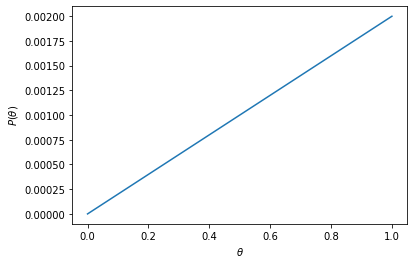

In [38]:
# 不同theta在r=1, 的事後機率

plt.plot(thetas, post)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta)$')

In [39]:
# 以上當作事前分配，再做一次，可以不斷看到事後、事前分配都被更新

prior = post
post = posterior(1, prior)
post

array([0.00000000e+00, 2.99550524e-09, 1.19820210e-08, ...,
       2.98353521e-03, 2.98951723e-03, 2.99550524e-03])

Text(0, 0.5, '$P(\\theta)$')

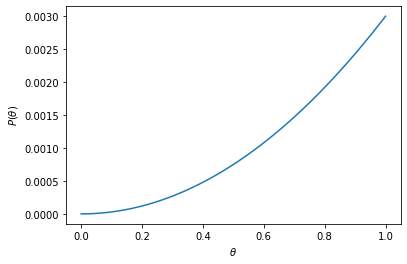

In [40]:
# 不同theta在r=1兩次後的事後機率

plt.plot(thetas, post)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta)$')

計算 r=1: 2次, r=0: 38次的更新結果

2/40 = 5% CTR

In [48]:
n_clicks = 2
n_non_clickes = 38

thetas = np.linspace(0, 1, 1001)
prior = np.array([1 / len(thetas) for _ in thetas])
post = prior



# 不點擊
for _ in range(n_non_clickes):
    post = posterior(0, post)
    
# 點擊
for _ in range(n_clicks):
    post = posterior(1, post)

Text(0, 0.5, '$P(\\theta)$')

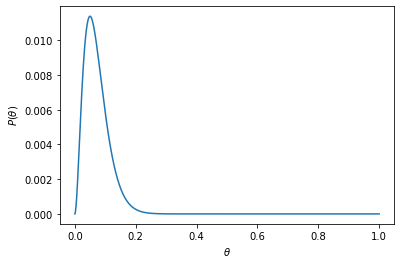

In [50]:
plt.plot(thetas, post)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta)$')

In [53]:
# 找到機率最大的theta

thetas[np.argmax(post)]

0.05

Text(0, 0.5, '$P(\\theta)$')

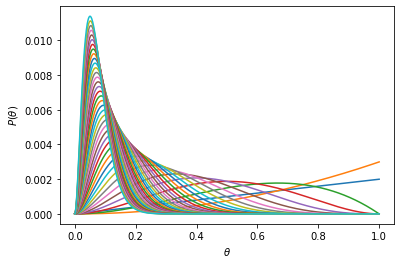

In [56]:
# 把整個事後分配隨著資料流入的變化畫出來


n_clicks = 2
n_non_clickes = 38

thetas = np.linspace(0, 1, 1001)
prior = np.array([1 / len(thetas) for _ in thetas])
post = prior

# 點擊
for _ in range(n_clicks):
    post = posterior(1, post)
    plt.plot(thetas, post)

# 不點擊
for _ in range(n_non_clickes):
    post = posterior(0, post)
    plt.plot(thetas, post)

    

plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta)$')

## Day35 - Designing ML System(ch4), Data-augmentation
1. Single-label preserving:
    - CV: 翻轉等等操作
    - NLP: 找到同義詞替代
2. Perturbation
**3. Data Synthesis**
- NLP, template
- CV, mixup
- GAN

In [ ]:
# 簡單的 NLP template 示意

replace_symbol = "[風味]"
sentence = "我今天想吃[風味]料理"

for e in ['義式', '美式', '泰國']

print(sentence.replace(replace_symbol, '意識'))